   max_depth        r2
0          1  0.310856
1          3  0.344060
2          5  0.407807
3          7  0.378697
4         10  0.296544


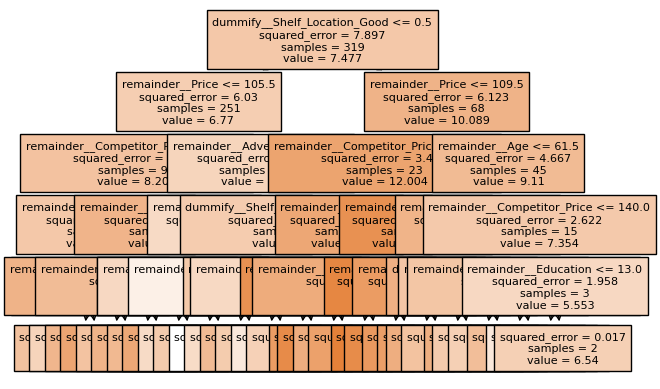

In [ ]:
#### Fit, Evaluate, and Interpret Decision Trees ####

# Importing necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from plotnine import ggplot, aes, geom_point, xlab, ylab

# Import data
ran_state = 1240
carseats_train = pd.read_csv("carseats_train.csv")
carseats_train = carseats_train.dropna()

carseats_test = pd.read_csv("carseats_test.csv")
carseats_test = carseats_test.dropna()

# Distinguish training and test data
X_train = carseats_train.drop(['Sales', 'Sales_cat'], axis=1)
y_train = carseats_train['Sales']

X_test = carseats_test.drop(['Sales', 'Sales_cat'], axis=1)
y_test = carseats_test['Sales']

# Model piece to handle categorical variables
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["US", "Urban", "Shelf_Location"]),
  ],
  remainder = "passthrough"
)


## Regression Tree (Depth 1)
tree_pipeline = Pipeline(
  [("preprocessing", ct),
    ("tree", DecisionTreeRegressor(max_depth=1, ccp_alpha=0, min_samples_split=2, random_state=ran_state))]
).set_output(transform="pandas")


tree_fitted = tree_pipeline.fit(X_train, y_train)

y_pred = tree_fitted.predict(X_test)

r2_1 = r2_score(y_test, y_pred)

## Regression Tree (Depth 3)
tree_pipeline = Pipeline(
  [("preprocessing", ct),
    ("tree", DecisionTreeRegressor(max_depth=3, ccp_alpha=0, min_samples_split=2, random_state=ran_state))]
).set_output(transform="pandas")


tree_fitted = tree_pipeline.fit(X_train, y_train)

y_pred = tree_fitted.predict(X_test)

r2_2 = r2_score(y_test, y_pred)


## Regression Tree (Depth 5)
tree_pipeline = Pipeline(
  [("preprocessing", ct),
    ("tree", DecisionTreeRegressor(max_depth=5, ccp_alpha=0, min_samples_split=2, random_state=ran_state))]
).set_output(transform="pandas")


tree_fitted = tree_pipeline.fit(X_train, y_train)

y_pred = tree_fitted.predict(X_test)

r2_3 = r2_score(y_test, y_pred)

# Print the decision tree model with Max Depth of 5
tree.plot_tree(tree_fitted['tree'], feature_names = list(ct.transform(X_train).columns),
              filled = True, fontsize = 8)

## Regression Tree (Depth 7)
tree_pipeline = Pipeline(
  [("preprocessing", ct),
    ("tree", DecisionTreeRegressor(max_depth=7, ccp_alpha=0, min_samples_split=2, random_state=ran_state))]
).set_output(transform="pandas")


tree_fitted = tree_pipeline.fit(X_train, y_train)

y_pred = tree_fitted.predict(X_test)

r2_4 = r2_score(y_test, y_pred)

## Regression Tree (Depth 10)
tree_pipeline = Pipeline(
  [("preprocessing", ct),
    ("tree", DecisionTreeRegressor(max_depth=10, ccp_alpha=0, min_samples_split=2, random_state=ran_state))]
).set_output(transform="pandas")


tree_fitted = tree_pipeline.fit(X_train, y_train)

y_pred = tree_fitted.predict(X_test)

r2_5 = r2_score(y_test, y_pred)

# From summary output above
d = {'max_depth': [1, 3, 5, 7, 10], 'r2': [r2_1, r2_2, r2_3, r2_4, r2_5] }
results = pd.DataFrame(data = d)

print(results)

In [ ]:
# Predictions for two shelves

# Create data frame for new observations
new_store = {'US': ["Yes", "Yes"],
            'Urban': ["Yes", "Yes"],
            'Advertising': [6.3, 6.3],
            'Shelf_Location': ["Good", "Medium"],
            'Population': [245.78, 245.78],
            'Competitor_Price': [125, 125],
            'Income': [67, 67],
            'Price': [115.7, 115.7],
            'Age': [53, 53],
            'Education': [14, 14]
            }
new_store = pd.DataFrame(data = new_store)

# Build decision tree model
tree_pipeline = Pipeline(
  [("preprocessing", ct),
    ("tree", DecisionTreeRegressor(max_depth=5, ccp_alpha=0, min_samples_split=2, random_state=ran_state))]
).set_output(transform="pandas")


tree_fitted = tree_pipeline.fit(X_train, y_train)

# Compute and print predictions
y_pred = tree_fitted.predict(new_store)

print("Predictions for Two Shelf Placements:")
print(y_pred)

Predictions for Two Shelf Placements:
[10.72409091  5.21961039]
